# Prompt Explorer

This is a notebook for exploring prompts and seeds. Random seeds are generated and displayed. The idea is to have this running alongside other more complicated notebooks, but this one doesn't needs to have gdrive connection. Then when finding cool prompt/seed combos, but them in the prompts google sheet and have those more complex notebooks reference the sheet vs defining prompts as variables in the code. 

In [21]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
from IPython.display import clear_output

drive.mount('/content/gdrive')

song_name = 'emit' #@param {type:"string"}

code_folder = '/content/gdrive/MyDrive/AI-Art Kyle'

fp = os.path.join(code_folder, 'input_data.xlsx')
df_prompt = pd.read_excel(fp, 'prompts_{}'.format(song_name), index_col=0).dropna(how='all')
df_prompt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


prompt  \
name                                                                
forest fractal  art nouveau paisley forest green trees towerin...   
ent goddess     goddess of forest, ent, treebeard, Greg Rutkow...   
bleak forest    a bleak cold forest, hanging moss, rainy and w...   
spring forest   a forest in spring, budding trees, blossom, su...   
bleak forest2   photographic oil painting, a bleak cold forest...   
spring forest2  photographic oil painting, a bleak cold forest...   
spring forest3  photographic oil painting, a closeup forest in...   
spring forest4  photographic oil painting, a closeup forest in...   
ent goddess2    photographic oil painting, intricate tree, int...   

                                                            seeds  \
name                                                                
forest fractal   1211791917029913 5827885609806161 96421823442699   
ent goddess     7278863642695197 4259726469180 426869046215691...   
bleak forest    6767865004613778 6759047549409470 511052135116...   
spring forest   4389454171519858 2529657157030241 660824223683...   
bleak forest2   1808755779399910 1349057331417771 876126852822...   
spring forest2  8035801943785440 2260468754000692 587278349118...   
spring forest3  523649128735766 1649768282847187 2136974205040...   
spring forest4  2912744759666280 139701997255405 3280873418086...   
ent goddess2    4333363249993710 3225283580510398 261501504562...   

                guidance_scale  
name                            
forest fractal             7.5  
ent goddess                7.5  
bleak forest               7.5  
spring forest              7.5  
bleak forest2              7.5  
spring forest2             7.5  
spring forest3             7.5  
spring forest4             7.5  
ent goddess2               7.5

In [2]:
%%capture
!pip install diffusers
!pip install transformers scipy ftfy accelerate

import torch
from diffusers import StableDiffusionPipeline

In [3]:

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                               torch_dtype=torch.float16,
                                               safety_checker=None
                                               )  


pipe = pipe.to("cuda")

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [42]:
df_prompt = pd.read_excel(fp, 'prompts_{}'.format(song_name), index_col=0).dropna(how='all')
df_prompt.tail()

prompt  \
name                                                                
bleak forest2   photographic oil painting, a bleak cold forest...   
spring forest2  photographic oil painting, a bleak cold forest...   
spring forest3  photographic oil painting, a closeup forest in...   
spring forest4  photographic oil painting, a closeup forest in...   
ent goddess2    photographic oil painting, intricate tree, int...   

                                                            seeds  \
name                                                                
bleak forest2   1808755779399910 1349057331417771 876126852822...   
spring forest2                                                NaN   
spring forest3  523649128735766 1649768282847187 2136974205040...   
spring forest4  2912744759666280 139701997255405 3280873418086...   
ent goddess2    4333363249993710 3225283580510398 261501504562...   

                guidance_scale  
name                            
bleak forest2              7.5  
spring forest2             7.5  
spring forest3             7.5  
spring forest4             7.5  
ent goddess2               7.5

Seeds: [7458522522589569, 66501055027166, 6252553709028108, 6552272840584102, 332014957280591, 7399976157699472, 8695653771599602, 415239716283834]


  0%|          | 0/50 [00:00<?, ?it/s]

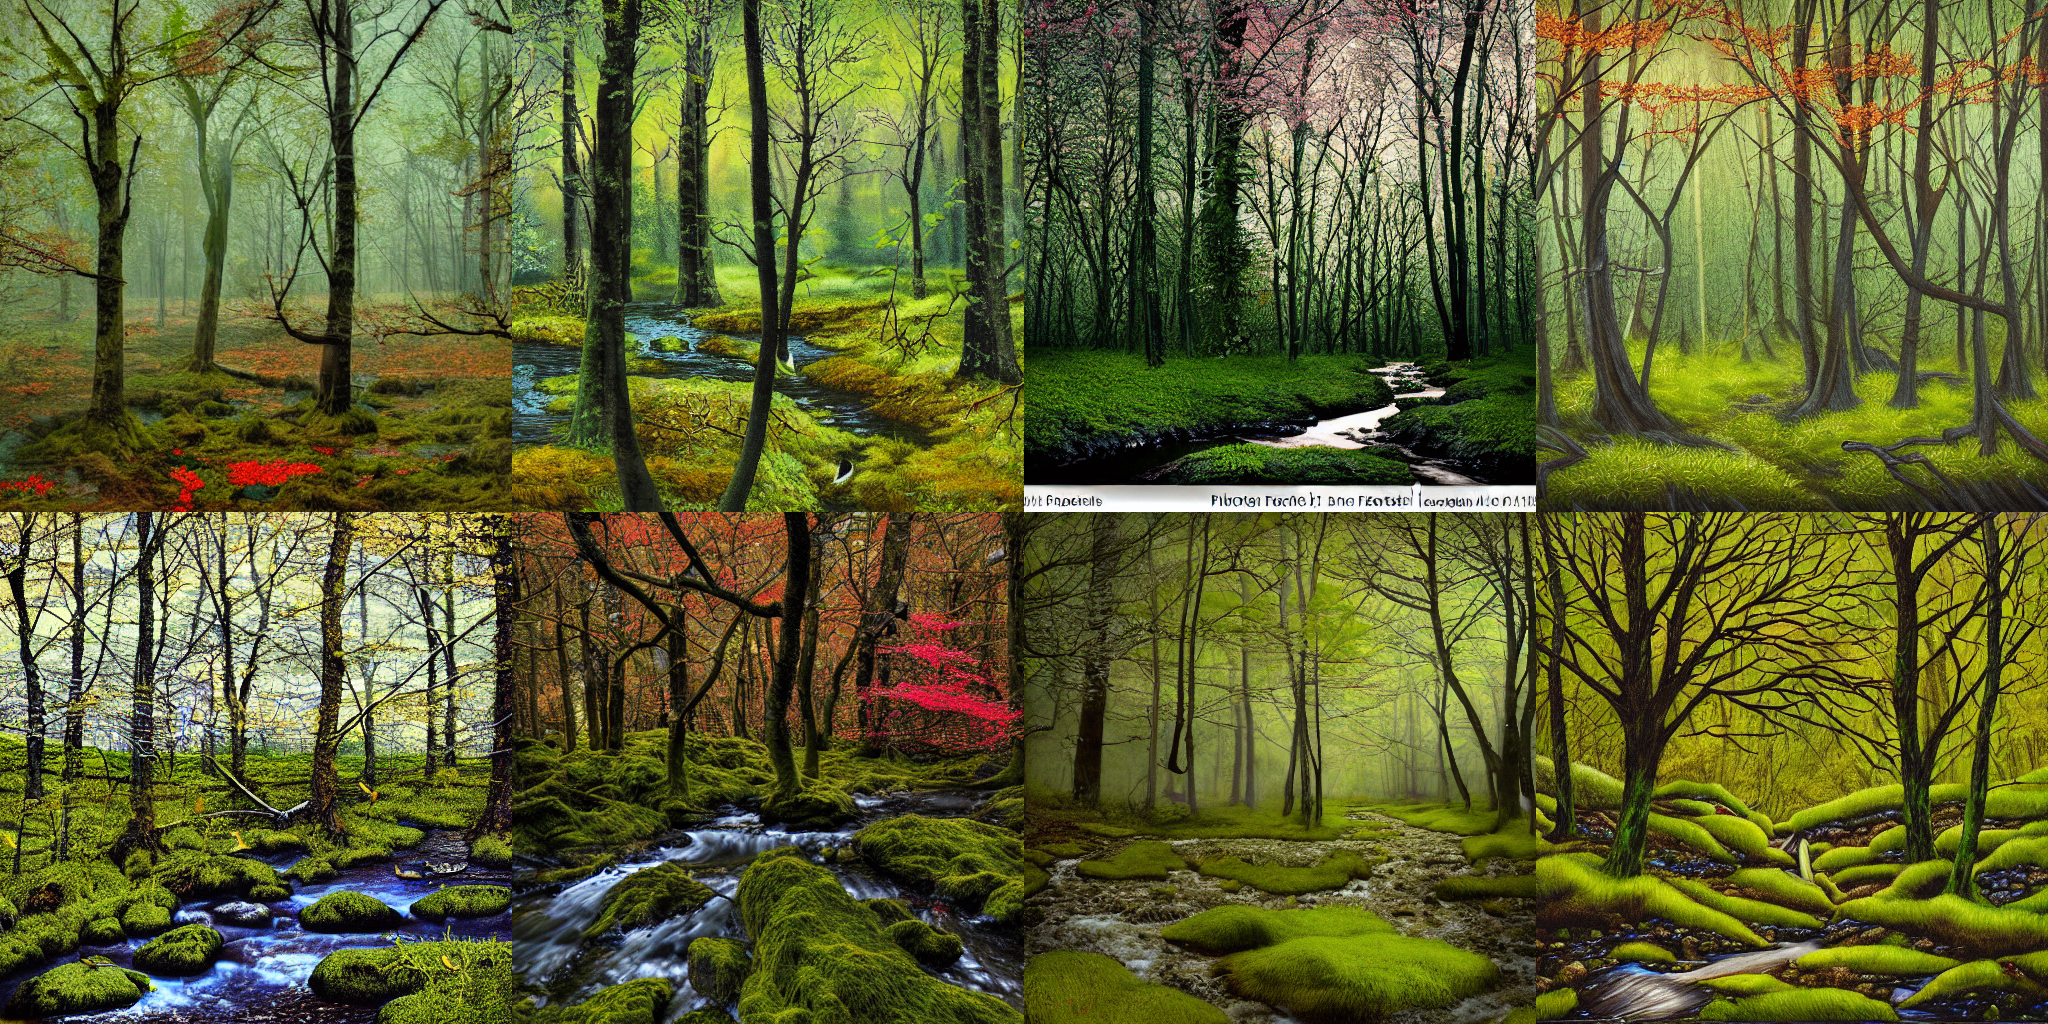

In [49]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


# # https://huggingface.co/docs/diffusers/using-diffusers/reusing_seeds

prompt_name = 'spring forest2'
prompt = df_prompt['prompt'][prompt_name]
guidance_scale = float(df_prompt['guidance_scale'][prompt_name])


# prompt = """

# """

# rows X cols of images. Reduce for speed and memory issues. 
rows = 2
cols = 4

num_images = rows*cols

# Make new random seeds in a hacky way. TODO: probably a function to generate seeds without making a generator instance. 

generator = torch.Generator(device="cuda")
seeds = [generator.seed() for i in range(num_images)]
generator = [torch.Generator(device="cuda").manual_seed(seed) for seed in seeds]

print("Seeds: {}".format(seeds))

images = pipe(prompt, generator=generator, num_images_per_prompt=rows*cols).images

image_grid(images, rows=rows, cols=cols)